In [ ]:
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12



# Predicting Ages According to APOKASC-2 (Pinsonneault et al. 2018)

# Importing the Necessary Data Tables
filename = r'C:\Users\david\OneDrive\Desktop\astraAllStarASPCAP-0.6.0.fits\astraAllStarASPCAP-0.6.0.fits' # Change Filepath As Necessary
tb = fits.open(filename)
data = tb[2].data 
mask_gaia = (data['zgr_plx']>0)
data_masked=data[mask_gaia]
apokasc2raw = Table.read(r"C:\Users\david\OneDrive\Desktop\Pinsonneault2018.txt",format="ascii.tab",fill_values=[('...', 'nan')]) # Change Filepath As Necessary
apokasc2raw['Age']=10**(np.array(apokasc2raw['Log Age']))/1000.0
hasagea2 = np.where((apokasc2raw['Age']==apokasc2raw['Age']) & (apokasc2raw['Age']>0.1))
apokasc2 = apokasc2raw[hasagea2]
agedata= apokasc2
intersect, ind_a, ind_b = np.intersect1d(data_masked['sdss4_apogee_id'],agedata['2MASS'], return_indices=True) 

# Setting Up The Neural Network According To Steps Taken In The Project
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
fullx = np.dstack([data_masked['teff'][ind_a],data_masked['logg'][ind_a], data_masked['m_h_atm'][ind_a],
                   data_masked['alpha_m_atm'][ind_a], data_masked['c_h'][ind_a], data_masked['n_h'][ind_a]])[0]
fully = np.dstack([agedata['Age'][ind_b]])[0] #for Pinsonneault 2018
mask = np.all(np.isfinite(fullx), axis=1) & np.all(np.isfinite(fully), axis=1)
fullx, fully = fullx[mask], fully[mask]
scaling_x = np.median(fullx, axis=0)
scaling_y = np.median(fully, axis=0)
fullx, fully = fullx/scaling_x, fully/scaling_y
neurons_per_layer=12
layers=3
iterations=100
inputs = keras.Input(shape=(6,))
layer1 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs)
layer2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1)
layer3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2)
layer4 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer3)
layer5 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer4)
layer6 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer5)
layer7 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer6)
layer8 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer7)
layer9 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer8)
layer10 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer9)
layer11 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer10)
layer12 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer11)
layer13 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer12)
layer14 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer13)
layer15 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer14)
layer16 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer15)
layer17 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer16)
layer18 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer17)
layer19 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer18)
layer20 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer19)
layer21 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer20)
layer22 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer21)
layer23 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer22)
outputs = keras.layers.Dense(1)(layer4)
model = keras.Model(inputs=inputs, outputs=outputs, name='test')
model.summary()
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Setting The Correct Data Catalogue For Analysis
tenpercent=len(agedata['Age'][ind_b])//10
trainbin=slice(0,-1*tenpercent-1) # Using last name before M 
testing=slice(-1*tenpercent,-1) # Using last name before M 
x_train, y_train = fullx[trainbin], fully[trainbin]
x_test, y_test = fullx[testing], fully[testing]
model.fit(x_train, y_train, epochs=iterations, validation_split=0.05, batch_size=300)
predictions = model.predict(x_test)
print(len(predictions))
metric=0.3
goodfit=np.where(((1-metric) < predictions/y_test) & ((1+metric) > predictions/y_test)) 
badfit=np.where(((1-metric) > predictions/y_test) | ((1+metric) < predictions/y_test))

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 565 (2.21 KB)

 Trainable params: 565 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.0013 - loss: 8.0105 - val_accuracy: 0.0000e+00 - val_loss: 2.0383
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 7.4502e-04 - loss: 1.3231 - val_accuracy: 0.0000e+00 - val_loss: 0.9574
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 7.4502e-04 - loss: 0.8143 - val_accuracy: 0.0000e+00 - val_loss: 0.7490
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 7.4502e-04 - loss: 0.7017 - val_accuracy: 0.0000e+00 - val_loss: 0.6545
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 7.4502e-04 - loss: 0.6257 - val_accuracy: 0.0000e+00 - val_loss: 0.5654
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 9.3127e-04 - loss: 0.5569 - val_accuracy: 0.0000e+00 - val_loss: 0.5014
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 9.3127e-04 - loss: 0.5006 - val_accuracy: 0.0000e+00 - val_loss: 0.4514
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

With  12 neurons per layer,  3 layers, and  100 iterations
using the training set slice(0, -653, None)
57.91090629800307 percent of the ages are good
42.08909370199693 percent of the ages are bad


(0.0, 14.0)

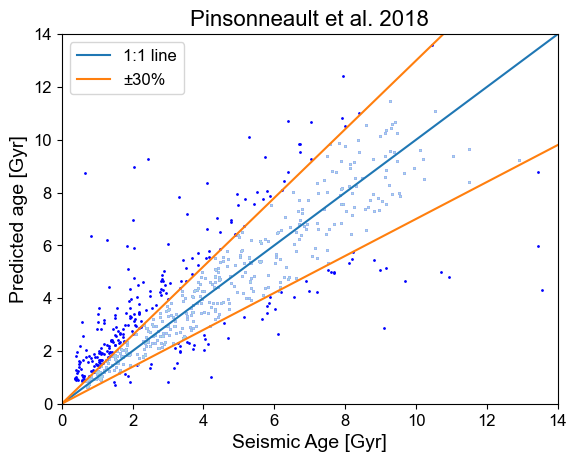

In [7]:
# Getting Useful Plots And Information To Understand NN's Prediction
print ('With ', neurons_per_layer, 'neurons per layer, ', layers, 'layers, and ', iterations, 'iterations')
print ('using the training set', trainbin)
print (len(goodfit[0])/len(y_test)*100, 'percent of the ages are good')
print (len(badfit[0])/len(y_test)*100, 'percent of the ages are bad')
plt.scatter( (y_test*scaling_y),(predictions*scaling_y), s=1, color='blue')
plt.scatter( (y_test[goodfit]*scaling_y),(predictions[goodfit]*scaling_y), s=1, color='lightblue')
plt.xlim(0.,14.)
plt.plot([0.,14.], [0.,14.], label='1:1 line')
plt.plot([14,0,14], [14*(1-metric), 0, 14*(1+metric)], label='±30%')
plt.ylabel(r'Predicted age [Gyr]')
plt.xlabel(r'Seismic Age [Gyr]')
plt.title("Pinsonneault et al. 2018")
plt.legend()
plt.ylim(0,14)

In [8]:
# Predicting Ages According to Mackereth et al 2019

# Importing the Necessary Data Tables
filename = r'C:\Users\david\OneDrive\Desktop\astraAllStarASPCAP-0.6.0.fits\astraAllStarASPCAP-0.6.0.fits' # Change Filepath As Necessary
tb = fits.open(filename)
data = tb[2].data 
mask_gaia = (data['zgr_plx']>0)
data_masked=data[mask_gaia]
path = r"C:\Users\david\OneDrive\Desktop\astroNNBayes_ages_goodDR14.fits" # Change Filepath As Necessary
Mackereth_2019raw = Table.read(path)
hasagea2 = np.where((Mackereth_2019raw['astroNN_age']==Mackereth_2019raw['astroNN_age']) & (Mackereth_2019raw['astroNN_age']>0.1))
Mackereth_2019 = Mackereth_2019raw[hasagea2]
agedata= Mackereth_2019
intersect, ind_a, ind_b = np.intersect1d(data_masked['sdss4_apogee_id'],agedata['APOGEE_ID'], return_indices=True) 

# Setting Up The Neural Network According To Steps Taken In The Project
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
fullx = np.dstack([data_masked['teff'][ind_a],data_masked['logg'][ind_a], data_masked['m_h_atm'][ind_a],
                   data_masked['alpha_m_atm'][ind_a], data_masked['c_h'][ind_a], data_masked['n_h'][ind_a]])[0]
fully = np.dstack([agedata['astroNN_age'][ind_b]])[0] #for Pinsonneault 2018
mask = np.all(np.isfinite(fullx), axis=1) & np.all(np.isfinite(fully), axis=1)
fullx, fully = fullx[mask], fully[mask]
scaling_x = np.median(fullx, axis=0)
scaling_y = np.median(fully, axis=0)
fullx, fully = fullx/scaling_x, fully/scaling_y
neurons_per_layer=12
layers=3
iterations=100
inputs = keras.Input(shape=(6,))
layer1 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs)
layer2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1)
layer3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2)
layer4 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer3)
layer5 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer4)
layer6 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer5)
layer7 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer6)
layer8 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer7)
layer9 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer8)
layer10 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer9)
layer11 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer10)
layer12 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer11)
layer13 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer12)
layer14 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer13)
layer15 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer14)
layer16 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer15)
layer17 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer16)
layer18 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer17)
layer19 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer18)
layer20 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer19)
layer21 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer20)
layer22 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer21)
layer23 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer22)
outputs = keras.layers.Dense(1)(layer4)
model = keras.Model(inputs=inputs, outputs=outputs, name='test')
model.summary()
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Setting The Correct Data Catalogue For Analysis
tenpercent=len(agedata['astroNN_age'][ind_b])//10
trainbin=slice(0,-1*tenpercent-1) # Using last name before M 
testing=slice(-1*tenpercent,-1) # Using last name before M 
x_train, y_train = fullx[trainbin], fully[trainbin]
x_test, y_test = fullx[testing], fully[testing]
model.fit(x_train, y_train, epochs=iterations, validation_split=0.05, batch_size=300)
predictions = model.predict(x_test)
print(len(predictions))
metric=0.3
goodfit=np.where(((1-metric) < predictions/y_test) & ((1+metric) > predictions/y_test)) 
badfit=np.where(((1-metric) > predictions/y_test) | ((1+metric) < predictions/y_test))

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 565 (2.21 KB)

 Trainable params: 565 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5269 - val_accuracy: 0.0000e+00 - val_loss: 0.2113
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1164 - val_accuracy: 0.0000e+00 - val_loss: 0.1153
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0661 - val_accuracy: 0.0000e+00 - val_loss: 0.0630
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0495 - val_accuracy: 0.0000e+00 - val_loss: 0.0579
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0474 - val_accuracy: 0.0000e+00 - val_loss: 0.0556
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0463 - val_accuracy: 0.0000e+00 - val_loss: 0.0545
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0455 - val_accuracy: 0.0000e+00 - val_loss: 0.0532
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 

With  12 neurons per layer,  3 layers, and  100 iterations
using the training set slice(0, -6070, None)
93.44100197758735 percent of the ages are good
6.558998022412657 percent of the ages are bad


(0.0, 14.0)

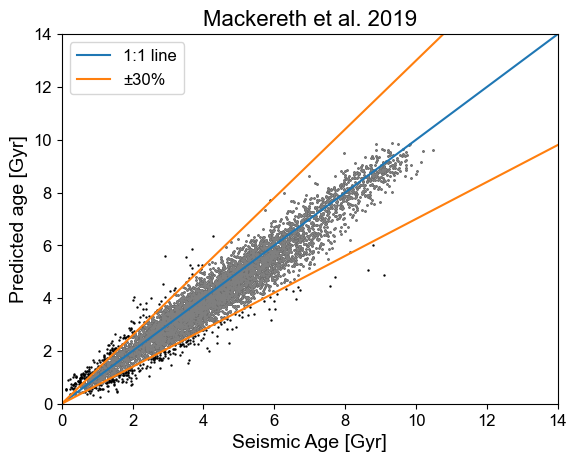

In [9]:
# Getting Useful Plots And Information To Understand NN's Prediction
print ('With ', neurons_per_layer, 'neurons per layer, ', layers, 'layers, and ', iterations, 'iterations')
print ('using the training set', trainbin)
print (len(goodfit[0])/len(y_test)*100, 'percent of the ages are good')
print (len(badfit[0])/len(y_test)*100, 'percent of the ages are bad')
plt.scatter( (y_test*scaling_y),(predictions*scaling_y), s=0.5, color='black')
plt.scatter( (y_test[goodfit]*scaling_y),(predictions[goodfit]*scaling_y), s=0.5, color='gray')
plt.xlim(0.,14.)
plt.plot([0.,14.], [0.,14.], label='1:1 line')
plt.plot([14,0,14], [14*(1-metric), 0, 14*(1+metric)], label='±30%')
plt.ylabel(r'Predicted age [Gyr]')
plt.xlabel(r'Seismic Age [Gyr]')
plt.title("Mackereth et al. 2019")
plt.legend()
plt.ylim(0,14)